<a href="https://colab.research.google.com/github/Aditic1/IPL_Sentiment/blob/main/Lemmatization_Final__Train_And_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


# Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Labelled_Dataset.csv'
Dataset = pd.read_csv(file_path,encoding='ISO-8859-1')
Dataset.dropna()

,english_text,Sentiment
0,"['brother', 'dangerous', 'pacer', 'season', 'i...",Positive
1,"['purple', 'heart', 'smiling', 'face', 'horn']",Neutral
2,"['kkr', 'purple', 'heart', 'smiling', 'face', ...",Positive
3,"['bar', 'ke', 'ipl', 'semi', 'final', 'mein', ...",Positive
4,"['csk', 'yellow', 'heart', 'yellow', 'heart', ...",Positive
...,...,...
1678,"['rcb', 'win', 'ipl', 'red', 'heart', 'red', '...",Positive
1679,"['kkr', 'purple', 'heart']",Positive
1680,"['e', 'sala', 'cup', 'namad', 'red', 'heart']",Positive
1681,['kl'],Positive


# Count number of positives, negatives and neutrals

In [4]:
Dataset['Sentiment'].value_counts()



Sentiment
Positive    1243
Neutral      288
Negative     152
Name: count, dtype: int64

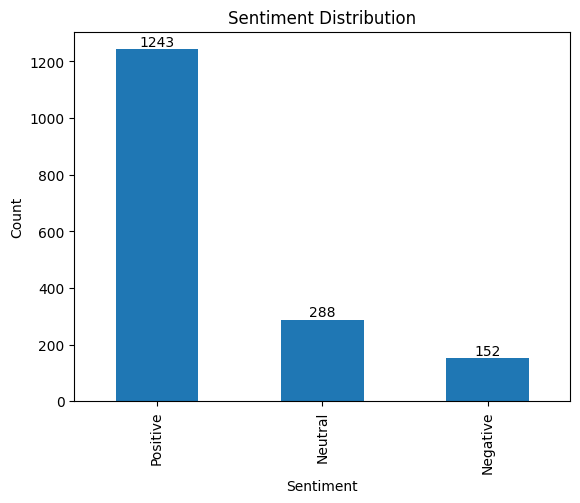

In [5]:
# Counting sentiment occurrences
sentiment_counts = Dataset['Sentiment'].value_counts()

# Plotting the sentiment distribution
import matplotlib.pyplot as plt

ax = sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10)
plt.show()


# Split into test and train

In [6]:
X = Dataset['english_text'].astype(str)
Y = Dataset['Sentiment']
#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


# TF-IDF

In [7]:

#create a tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

#Fit and transform the training data
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)

#Fit and transform the testing data
X_tfidf_test  = tfidf_vectorizer.transform(X_test)

tfidf_vectorizer.get_feature_names_out()


array(['aa', 'aaaaa', 'aah', ..., 'yrr', 'zeebe', 'zone'], dtype=object)

# Tranining the model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Create and train a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_tfidf_train, Y_train)

# Predictions on the test set
y_naive_pred = naive_bayes_classifier.predict(X_tfidf_test)


#For SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_tfidf_train, Y_train)

# Predictions on the test set
y_svm_pred = svm_classifier.predict(X_tfidf_test)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
random_forest_classifier.fit(X_tfidf_train, Y_train)

# Predictions on the test set
y_random_pred = random_forest_classifier.predict(X_tfidf_test)

from sklearn.naive_bayes import GaussianNB
import numpy as np

# Assuming Gaussian distribution for the features
# Convert sparse matrix to dense matrix
X_dense_train = X_tfidf_train.toarray()
X_dense_test = X_tfidf_test.toarray()

# Create and train a Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_dense_train, Y_train)

# Predictions on the test set
y_gaussian_pred = gaussian_classifier.predict(X_dense_test)


# Evaluating the accuracy with TF-IDF

In [9]:
# Evaluate the Multinomial model
naive_tfidf_accuracy = accuracy_score(Y_test, y_pred = naive_bayes_classifier.predict(X_tfidf_test)
)
print("The accuracy with tfidf and naive bayes (Multinomial) is", naive_tfidf_accuracy)

naive_tfidf_gaussian_accuracy = accuracy_score(Y_test, y_gaussian_pred)

print("The accuracy with tfidf and naive bayes (Gaussian) is:", naive_tfidf_gaussian_accuracy)

# Evaluate the model
svm_tfidf_accuracy = accuracy_score(Y_test, y_svm_pred)
print("The accuracy with tfidf and SVM  is",svm_tfidf_accuracy)

# Evaluate the model
random_tfidf_accuracy = accuracy_score(Y_test, y_random_pred)
print("The accuracy with tfidf and Random Forest is", random_tfidf_accuracy)


The accuracy with tfidf and naive bayes (Multinomial) is 0.7626112759643917
The accuracy with tfidf and naive bayes (Gaussian) is: 0.42729970326409494
The accuracy with tfidf and SVM  is 0.8071216617210683
The accuracy with tfidf and Random Forest is 0.7893175074183977


#Bag Of Words

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

#Fit and Transform the training data
X_cv_train = vectorizer.fit_transform(X_train)
#Fit and transform the testing data
X_cv_test = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()


array(['aa', 'aaaaa', 'aah', ..., 'yrr', 'zeebe', 'zone'], dtype=object)

Naive Bayes

In [11]:
#Naive Bayes classifier
naive_bayes_classifier.fit(X_cv_train, Y_train)
# Predictions on the test set
y_pred = naive_bayes_classifier.predict(X_cv_test)

X_dense_train = X_cv_train.toarray()
X_dense_test = X_cv_test.toarray()

# Create and train a Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_dense_train, Y_train)

# Predictions on the test set
y_gaussian_pred = gaussian_classifier.predict(X_dense_test)

#SVM
svm_classifier.fit(X_cv_train, Y_train)

# Predictions on the test set
y_SVM_pred = svm_classifier.predict(X_cv_test)

#Random Forest
random_forest_classifier.fit(X_cv_train, Y_train)

# Predictions on the test set
y_random_pred = random_forest_classifier.predict(X_cv_test)


Accuracy with SVM, Naive and RandomForest with Bag of Words
---



In [12]:
# Evaluate the model
naive_cv_accuracy = accuracy_score(Y_test, y_pred)
print("The accuracy with BOW and Naive (Multinomial) is",naive_cv_accuracy)

naive_cv_gaussian_accuracy = accuracy_score(Y_test,y_gaussian_pred)
print("The accuracy with tfidf and naive bayes (Gaussian) is:", naive_tfidf_gaussian_accuracy)

# Evaluate the model
svm_cv_accuracy = accuracy_score(Y_test, y_SVM_pred)
print("The accuracy with BOW and SVM is",svm_cv_accuracy)

random_cv_accuracy = accuracy_score(Y_test, y_random_pred)
print("The accuracy with BOW and RandomForest (Multinomial) is:", random_cv_accuracy)

The accuracy with BOW and Naive (Multinomial) is 0.7833827893175074
The accuracy with tfidf and naive bayes (Gaussian) is: 0.42729970326409494
The accuracy with BOW and SVM is 0.771513353115727
The accuracy with BOW and RandomForest (Multinomial) is: 0.7685459940652819


#

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized_train = [word_tokenize(text.lower()) for text in X_train]
tokenized_test = [word_tokenize(text.lower()) for text in X_test]

# Training Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to create average word vectors
def feature_vectorizer(tokens, model):
    words = [word for word in tokens if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(100)

# Transforming text into average vectors
x_train_w2v = np.array([feature_vectorizer(text, model_w2v) for text in tokenized_train])
x_test_w2v = np.array([feature_vectorizer(text, model_w2v) for text in tokenized_test])

print("\nThis is what Word To Vector(w2v) Representation looks like-")
print(x_train_w2v[:2])
print("\n*Word2Vec SUCCESSFULLY GENERATED!*")

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define classifiers
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()

# Train Naive Bayes classifier
nb_classifier.fit(x_train_w2v, Y_train)
# Predict and calculate accuracy
w2v_nb_predictions = nb_classifier.predict(x_test_w2v)
w2v_nb_accuracy = accuracy_score(Y_test, w2v_nb_predictions)

# Train Random Forest classifier
rf_classifier.fit(x_train_w2v, Y_train)
# Predict and calculate accuracy
w2v_rf_predictions = rf_classifier.predict(x_test_w2v)
w2v_rf_accuracy = accuracy_score(Y_test, w2v_rf_predictions)

# Train SVM classifier
svm_classifier.fit(x_train_w2v, Y_train)
# Predict and calculate accuracy
w2v_svm_predictions = svm_classifier.predict(x_test_w2v)
w2v_svm_accuracy = accuracy_score(Y_test, w2v_svm_predictions)

print("Naive Bayes Accuracy:", w2v_nb_accuracy)
print("Random Forest Accuracy:", w2v_rf_accuracy)
print("SVM Accuracy:", w2v_svm_accuracy)


Naive Bayes Accuracy: 0.5459940652818991
Random Forest Accuracy: 0.7388724035608308
SVM Accuracy: 0.744807121661721


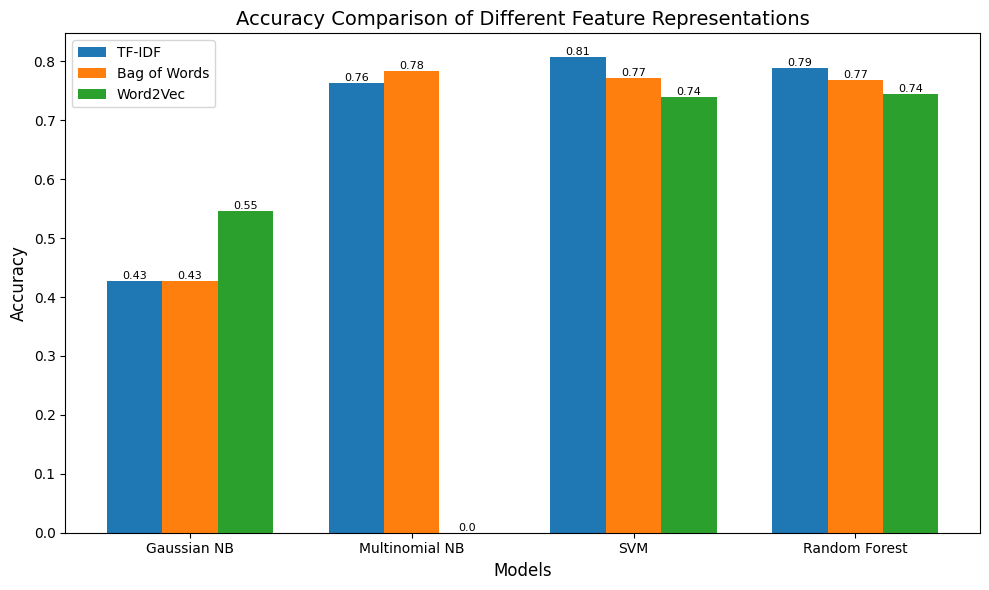

In [36]:
import matplotlib.pyplot as plt

# Accuracies for different feature representations
tfidf_accuracies = [naive_tfidf_gaussian_accuracy, naive_tfidf_accuracy, svm_tfidf_accuracy, random_tfidf_accuracy]
cv_accuracies = [naive_cv_gaussian_accuracy, naive_cv_accuracy, svm_cv_accuracy, random_cv_accuracy]
w2v_accuracies = [w2v_nb_accuracy, 0, w2v_rf_accuracy, w2v_svm_accuracy]  # Assuming the second accuracy is 0, as it's not provided in your code

# Labels for the bars
models = ['Gaussian NB', 'Multinomial NB', 'SVM', 'Random Forest']

# Plotting the accuracies
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(models))

bars1 = plt.bar(index, tfidf_accuracies, bar_width, label='TF-IDF')
bars2 = plt.bar([i + bar_width for i in index], cv_accuracies, bar_width, label='Bag of Words')
bars3 = plt.bar([i + bar_width*2 for i in index], w2v_accuracies, bar_width, label='Word2Vec')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Different Feature Representations', fontsize=14)
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Adding labels on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()